# Predictive Analytics Data

### Key Points: 

1. Standardize the data
2. Split into training and test data
3. Find hyper-param for SVM, classification-tree and linear-regression

In [43]:
# libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [44]:
# confusion matrix

def confusion_matrix(y,y_predict):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Matrix')
    ax.xaxis.set_ticklabels(['notLanded', 'Landed']); ax.yaxis.set_ticklabels(['notLanded', 'Landed'])
    plt.show() 

In [45]:
# resource

data ='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv'
df=pd.read_csv(data)
df.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [46]:
# resource2 

data ='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
df=pd.read_csv(data)
df.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [47]:
# data digest: 
# creation a numPy array from Column Class in data = Y to standardize output for Pandas lib
X = pd.read_csv("dataset_part_3.csv")
X.head(100)

,CCAFS SLC 40,KSC LC 39A,VAFB SLC 4E,5e9e3032383ecb267a34e7c7,5e9e3032383ecb554034e7c9,5e9e3032383ecb6bb234e7ca,5e9e3032383ecb761634e7cb,5e9e3033383ecbb9e534e7cc,B0003,B0005,...,GEO,GTO,HEO,ISS,LEO,MEO,PO,SO,SSO,VLEO
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
86,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
87,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
88,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
data = pd.read_csv('dataset_part_2.csv')

Y = data['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [49]:
# data digest: 
# standardize X then assign variable X as:

transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

In [50]:
# split data to training 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
Y_test.shape

(18,)

In [51]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge

# define the model
lr = LogisticRegression(random_state = 12345)

# define the grid search object
grid_search_lr = GridSearchCV(
    estimator = lr,
    param_grid = parameters,
    scoring = 'accuracy',
    cv = 10
)
# execute search
logreg_cv = grid_search_lr.fit(X_train,Y_train)

In [52]:
print("tuned hpyerparam :(best params) ",logreg_cv.best_params_)
print("Acc :",logreg_cv.best_score_)

tuned hpyerparam :(best params)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Acc : 0.6964285714285714


In [53]:
# calc confidence on testing

print('Accuracy on test is: {:.3f}'.format(logreg_cv.score(X_test, Y_test)))

Accuracy on test is: 0.778


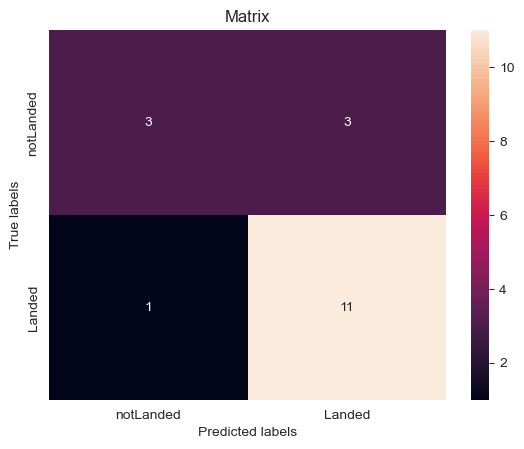

In [54]:
# matrix

yhat_lr = logreg_cv.predict(X_test)
confusion_matrix(Y_test, yhat_lr)

In [55]:
# SVM 

params = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(estimator=svm, cv=10, param_grid=params).fit(X_train, Y_train)

In [56]:
print("tuned hpyerparams :(best params) ",svm_cv.best_params_)
print("Acc:",svm_cv.best_score_)

tuned hpyerparams :(best params)  {'C': 31.622776601683793, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Acc: 0.7964285714285715


In [57]:
print("tuned hpyerparams :(best params) ",svm_cv.best_params_)
print("Acc :",svm_cv.best_score_)

tuned hpyerparams :(best params)  {'C': 31.622776601683793, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Acc : 0.7964285714285715


In [58]:
# accuracy on test

print('Accuracy on test is: {:.3f}'.format(svm_cv.score(X_test, Y_test)))

Accuracy on test is: 0.944


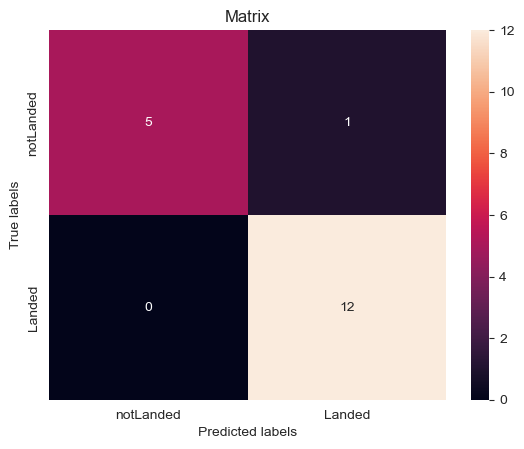

In [59]:
# matrix

svm_yhat=svm_cv.predict(X_test)
confusion_matrix(Y_test,svm_yhat)

In [60]:
# decision tree

parameters_tree = {'criterion': ['gini', 'entropy'],
                   'splitter': ['best', 'random'],
                   'max_depth': [2*n for n in range(1,10)],
                   'max_features': ['auto', 'sqrt'],
                   'min_samples_leaf': [1, 2, 4],
                   'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier(random_state = 12345)

grid_search_tree = GridSearchCV(
    estimator = tree,
    param_grid = parameters_tree,
    scoring = 'accuracy',
    cv = 10
)

tree_cv = grid_search_tree.fit(X_train, Y_train)

/Users/js/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/js/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/js/.local/lib/python3.10/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/js/.local/lib/python3.10/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/Users/js/.local/lib/pyth

In [61]:
print("tuned hyperparams :(best params) ",tree_cv.best_params_)
print("Acc :",tree_cv.best_score_)

tuned hyperparams :(best params)  {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Acc : 0.7821428571428571


In [62]:
# tree_cv accuracy

tree_cv_score = svm_cv.score(X_test, Y_test)
print("score :",tree_cv_score)

score : 0.9444444444444444


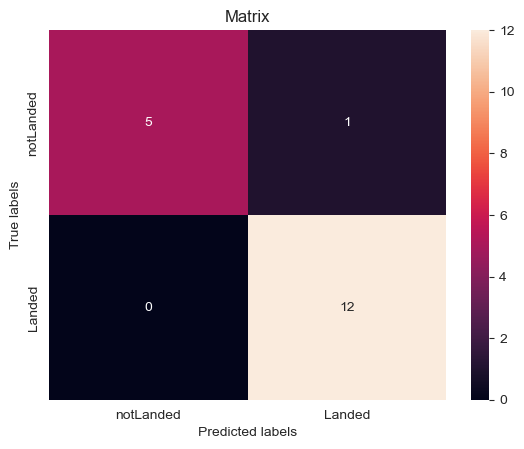

In [63]:
tree_yhat = svm_cv.predict(X_test)
confusion_matrix(Y_test,tree_yhat)

In [64]:
# k nearest neighbors

# define hyperparameters to tune
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

# define the model
knn = KNeighborsClassifier()

In [65]:
# define the grid search object
grid_search_knn = GridSearchCV(
    estimator = knn,
    param_grid = parameters,
    scoring = 'accuracy',
    cv = 10
)
# execute search
knn_cv = grid_search_knn.fit(X_train, Y_train)

In [66]:
print("tuned hpyerparams :(best params) ",knn_cv.best_params_)
print("Acc :",knn_cv.best_score_)

tuned hpyerparams :(best params)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Acc : 0.7392857142857142


In [67]:
# knn accuracy

print('Acc on test is: {:.3f}'.format(knn_cv.score(X_test, Y_test)))

Acc on test is: 0.722


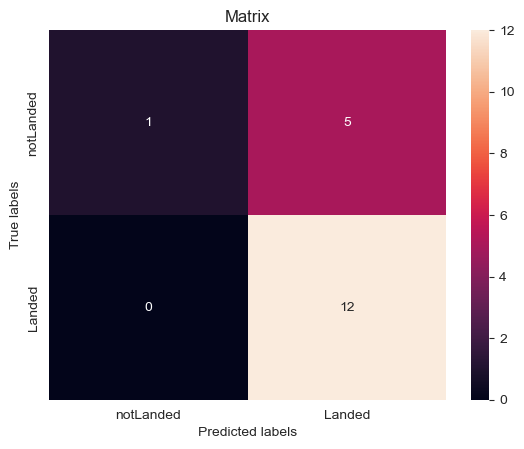

In [68]:
# matrix 

yhat = knn_cv.predict(X_test)
confusion_matrix(Y_test,yhat)

In [69]:
# what method perform best

models = {'KNeighbors':knn_cv.best_score_,
          'DecisionTree':tree_cv.best_score_,
          'LogisticRegression':logreg_cv.best_score_,
          'SupportVector': svm_cv.best_score_}

bestAlgorithm = max(models, key=models.get)
print('Best model : ', bestAlgorithm,'with score -> ', models[bestAlgorithm])
if bestAlgorithm == 'DecisionTree':
    print('Best params :', tree_cv.best_params_)
if bestAlgorithm == 'KNeighbors':
    print('Best params :', knn_cv.best_params_)
if bestAlgorithm == 'LogisticRegression':
    print('Best params :', logreg_cv.best_params_)
if bestAlgorithm == 'SupportVector':
    print('Best params :', svm_cv.best_params_)

Best model :  SupportVector with score ->  0.7964285714285715
Best params : {'C': 31.622776601683793, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
